<a href="https://colab.research.google.com/github/Saurav-Raghaw/Python/blob/main/PyTorch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######________Image Classification(MNSIT) and Logistic Regression______########

In [1]:
# Importing Libraries
import torch
import torchvision
from torchvision.datasets import MNIST

#torchvision contains some utilities for working with image data. 
#It also provides helper classes to download and import popular datasets like MNIST automatically.

In [4]:
# Downloading the MNSIT training dataset.
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [5]:
#There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. 
#We can create the test dataset using the MNIST class by passing train=False to the constructor.

test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

#It's a pair, consisting of a 28x28px image and a label. 
#The image is an object of the class PIL.Image.Image, which is a part of the Python imaging library Pillow. 
#We can view the image within Jupyter using matplotlib, the de-facto plotting and graphing library for data science in Python.

(<PIL.Image.Image image mode=L size=28x28 at 0x7F4C75A09C50>, 5)

In [9]:
import matplotlib.pyplot as plt
# %matplotlib inline

#The statement %matplotlib inline indicates to Jupyter that we want to plot the graphs within the notebook. 
#Without this line, Jupyter will show the image in a popup. 
#Statements starting with % are called magic commands and are used to configure the behavior of Jupyter itself.

Label: 5


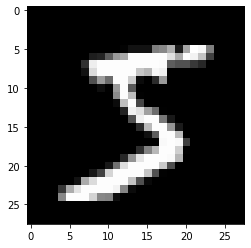

In [10]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


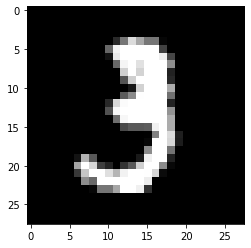

In [13]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [15]:
#PyTorch doesn't know how to work with images. We need to convert the images into tensors. 
#We can do this by specifying a transform while creating our dataset.

import torchvision.transforms as transforms

#PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. 
#The torchvision.transforms module contains many such predefined functions. 
#We'll use the ToTensor transform to convert images into PyTorch tensors.

In [16]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [17]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

#The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. 
#Since images in the MNIST dataset are grayscale, there's just one channel.

torch.Size([1, 28, 28]) 5


In [18]:
#Looking inside the tensor.

print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white, and the values in between different shades of grey. We can also plot the tensor as an image using plt.imshow.

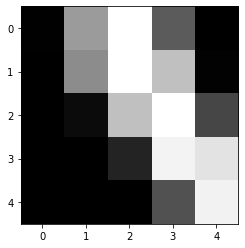

In [19]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

Note that we need to pass just the 28x28 matrix to plt.imshow, without a channel dimension. We also pass a color map (cmap=gray) to indicate that we want to see a grayscale image.

#Training set, Validation set and Test set


1.  Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.

2.  Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.

3.  Test set - used to compare different models or approaches and report the model's final accuracy.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [20]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the last 20% of images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-validation would make it impossible to train a useful model.

In [22]:
#Creating data loaders to help us load the data in batches.
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

#shuffle=True for the training data loader to ensure that the batches generated in each epoch are different. 
#This randomization helps generalize & speed up the training process. 
#On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images.

#Model
*  A logistic regression model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (pred = x @ w.t() + b).

*  Since nn.Linear expects each training example to be a vector, each 1x28x28 image tensor is flattened into a vector of size 784 (28*28) before being passed into the model.

*  The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [23]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [24]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0267,  0.0182,  0.0355,  ..., -0.0320, -0.0032,  0.0147],
        [ 0.0137, -0.0196, -0.0185,  ..., -0.0027,  0.0199,  0.0338],
        [ 0.0189, -0.0008,  0.0075,  ..., -0.0250,  0.0167,  0.0131],
        ...,
        [-0.0161,  0.0055, -0.0017,  ..., -0.0052,  0.0218, -0.0051],
        [-0.0179, -0.0140, -0.0226,  ..., -0.0017,  0.0145, -0.0352],
        [ 0.0289, -0.0065, -0.0011,  ..., -0.0216,  0.0266, -0.0189]],
       requires_grad=True)

In [25]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0164,  0.0041,  0.0292, -0.0020, -0.0040, -0.0238,  0.0102, -0.0311,
        -0.0320,  0.0264], requires_grad=True)

In [26]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([5, 7, 8, 3, 5, 4, 0, 1, 4, 1, 1, 8, 6, 9, 7, 8, 5, 5, 2, 0, 3, 1, 3, 4,
        1, 1, 6, 5, 8, 0, 9, 1, 9, 1, 2, 8, 3, 3, 9, 6, 9, 6, 7, 9, 7, 8, 8, 1,
        6, 2, 2, 6, 1, 0, 0, 0, 4, 9, 1, 0, 4, 4, 0, 4, 8, 5, 2, 5, 4, 3, 5, 0,
        9, 3, 9, 2, 2, 8, 3, 8, 8, 0, 2, 7, 9, 0, 8, 0, 5, 4, 7, 6, 9, 3, 6, 8,
        0, 0, 0, 9, 5, 2, 4, 8, 3, 2, 7, 5, 3, 3, 8, 5, 9, 0, 6, 5, 4, 9, 5, 1,
        7, 7, 9, 1, 1, 6, 7, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. 
*  To include this additional functionality within our model, we need to define a custom model by extending the nn.Module class from PyTorch.

In [27]:
images.shape

torch.Size([128, 1, 28, 28])

In [28]:
images.reshape(-1, 784).shape

torch.Size([128, 784])

In [30]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes) #Inside the __init__ constructor method, we instantiate the weights and biases using nn.Linear.
        
        #Inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear.
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

*  xb.reshape(-1, 28 x 28) indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

*  Note that the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute), but it does have a .parameters method that returns a list containing the weights and bias.

In [31]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [32]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0122, -0.0091, -0.0090,  ...,  0.0037,  0.0318, -0.0331],
         [ 0.0076, -0.0010, -0.0032,  ..., -0.0027, -0.0303, -0.0306],
         [-0.0091, -0.0094,  0.0008,  ...,  0.0245, -0.0150, -0.0054],
         ...,
         [ 0.0150,  0.0217, -0.0097,  ..., -0.0345, -0.0057, -0.0308],
         [-0.0101, -0.0211, -0.0252,  ..., -0.0316, -0.0013,  0.0216],
         [ 0.0264,  0.0119,  0.0187,  ...,  0.0257,  0.0209,  0.0299]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0104, -0.0010,  0.0306, -0.0342,  0.0263, -0.0114,  0.0213,  0.0245,
          0.0215, -0.0205], requires_grad=True)]

In [34]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

#For each of the 128 input images, we get 10 outputs, one for each class. 
#As discussed earlier, we'd like these outputs to represent probabilities. 
#Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case.

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.3901,  0.0585,  0.3499,  0.2719,  0.1609,  0.0528, -0.0213,  0.1986,
          0.2865, -0.3331],
        [-0.3079,  0.1798,  0.0186, -0.0172,  0.2178, -0.1639,  0.0543,  0.1857,
          0.0226, -0.0348]])


*  To convert the output rows into probabilities, we use the softmax function, which has the following formula:

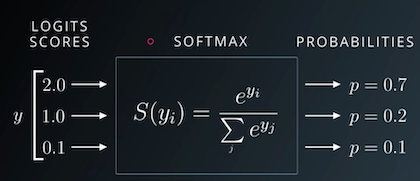

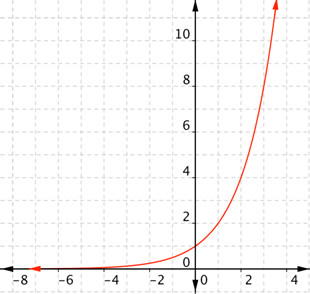

In [36]:
#we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).
#The softmax function is included in the torch.nn.functional package and requires us to specify a dimension along which the function should be applied.

import torch.nn.functional as F

In [37]:
outputs[:2]

tensor([[ 0.3901,  0.0585,  0.3499,  0.2719,  0.1609,  0.0528, -0.0213,  0.1986,
          0.2865, -0.3331],
        [-0.3079,  0.1798,  0.0186, -0.0172,  0.2178, -0.1639,  0.0543,  0.1857,
          0.0226, -0.0348]], grad_fn=<SliceBackward>)

In [39]:
# Applying softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Adding up the probabilities of an output row.
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1258, 0.0903, 0.1208, 0.1118, 0.1000, 0.0898, 0.0834, 0.1038, 0.1134,
         0.0610],
        [0.0715, 0.1165, 0.0992, 0.0957, 0.1210, 0.0826, 0.1028, 0.1172, 0.0996,
         0.0940]])
Sum:  0.9999999403953552


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns each row's largest element and the corresponding index.

In [40]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 4, 4, 0, 1, 4, 7, 4, 4, 0, 4, 4, 0, 4, 2, 4, 4, 3, 7, 4, 1, 4, 1, 4,
        4, 1, 4, 4, 4, 4, 4, 8, 2, 4, 2, 5, 4, 2, 4, 4, 2, 0, 4, 4, 2, 7, 1, 3,
        7, 4, 7, 1, 8, 2, 4, 4, 4, 4, 0, 8, 0, 4, 0, 8, 2, 7, 2, 4, 1, 4, 3, 4,
        4, 3, 4, 7, 0, 4, 7, 4, 4, 4, 7, 7, 7, 8, 4, 0, 4, 4, 1, 8, 0, 2, 0, 4,
        0, 4, 4, 1, 7, 1, 3, 1, 4, 0, 0, 4, 4, 4, 8, 7, 3, 4, 3, 1, 4, 2, 4, 7,
        4, 4, 3, 4, 4, 4, 1, 4])
tensor([0.1258, 0.1210, 0.1333, 0.1402, 0.1292, 0.1501, 0.1128, 0.1231, 0.1326,
        0.1432, 0.1244, 0.1207, 0.1179, 0.1196, 0.1149, 0.1543, 0.1196, 0.1171,
        0.1299, 0.1261, 0.1259, 0.1430, 0.1136, 0.1200, 0.1268, 0.1230, 0.1535,
        0.1206, 0.1308, 0.1365, 0.1603, 0.1304, 0.1315, 0.1149, 0.1125, 0.1161,
        0.1428, 0.1408, 0.1299, 0.1651, 0.1150, 0.1319, 0.1150, 0.1285, 0.1352,
        0.1110, 0.1204, 0.1218, 0.1336, 0.1233, 0.1112, 0.1330, 0.1366, 0.1360,
        0.1254, 0.1181, 0.1446, 0.1293, 0.1342, 0.1187, 0.1310, 0.1221, 0.1130,
       

In [41]:
labels

tensor([2, 8, 9, 2, 2, 4, 8, 4, 9, 2, 8, 5, 2, 7, 7, 5, 7, 6, 7, 8, 5, 7, 4, 8,
        7, 8, 5, 5, 4, 7, 9, 1, 3, 4, 4, 3, 6, 8, 0, 0, 2, 3, 1, 7, 8, 3, 7, 3,
        9, 9, 6, 4, 8, 3, 9, 4, 4, 7, 5, 6, 3, 8, 1, 6, 5, 1, 7, 9, 2, 8, 3, 0,
        6, 3, 7, 1, 9, 7, 6, 1, 8, 9, 8, 1, 6, 4, 9, 2, 7, 0, 4, 5, 0, 0, 3, 7,
        6, 4, 7, 2, 2, 6, 1, 2, 0, 8, 1, 0, 4, 0, 6, 5, 3, 6, 3, 0, 0, 1, 5, 9,
        4, 9, 8, 8, 4, 8, 5, 7])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.